# Team 7

# EDGE DETECTION FOR BIOMEDICAL APPLICATION

### About Edge Detection:
Egde detection is an image processing technique. It is used to find the boundaries of an object within an image. It is done by finding places in an image where the brightness of an image changes abruptly or the brightness changes at an accelerated rate. Edge detection is used to extract Subject of Interest (SOI) from the image such that further analysis can be done on the object extracted. It gives us an idea of what is happening in the real world. Edge detection is used for computer vision, pattern recognition and image analysis. Edge detection is a complex task. However, many techniques are available to achieve this

#####    Techniques for edge detection
The following are some of the available techniques for edge detection:
1. Canny
2. Roberts
3. Prewitt
4. Sobel
5. Scharr
6. Differential 
7. Deriche

Edge detection usually involves two steps in a broader sense ( Though several intermediate steps will be done )
1. Applying a filter to the image to smoothen the edges
2. Applying any one of the edge detection technique

### Edge detection in biomedical
The technique of edge detection is also used in biomedical. It is used in biomedical to identify the boundaries between objects in the image and to separate them. For example in order to identify the various organs present in the stomach ( Image acquired using CT scan ) edge detection is used to find the boundaries of liver ,stomach and so on. Also, it can be used to identify the presence of anu other object in the subject of interest ( For example, a blister or inflammaion in liver )

We have a DICOM image of a liver. Let's do the following to understand how edge detection is used in biomedical. The following are done in the upcoming sections
1. Rendering the DICOM image
2. Applying some edge detection techniques to the DICOM image


### Rendering the  DICOM image (IM_0028.dcm)

In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
import skimage.filters as im_filter

# Read the dicom image and assign it to a file handle
dicom_im = dicom.read_file('IM_0028.dcm')

# Dicom image contains information about the patient and various other things as metadata. This can be printed.
# Simply using print function prints all the metadata
print("***************************************** METADATA ******************************************************")
print(dicom_im)


***************************************** METADATA ******************************************************
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20120101'
(0008, 0013) Instance Creation Time              TM: '122531'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.2501708638.4193405253.2729028880.3304384116
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.3397498352.605445821.304410668.1378834227
(0008, 0020) Study Date                          DA: '20110101'
(0008, 0021) Series Date                         DA: '20110101'
(0008, 0022) Acquisition Date                    DA: '20110101'
(0008, 0023) Content Date                        DA: '20110101'
(0008, 0030) Study Time                          TM: '

###### Now let's print some of the basic information from the image

In [2]:
# Importing datetime package in order to extract the date and time information from the dicom image
from datetime import datetime
# Prints the basic information from the image 
print('Resolution                 : '+str(dicom_im.Rows)+'x'+str(dicom_im.Columns)+' pixels')
print('Manufacturer               : '+str(dicom_im.Manufacturer))
print('Model                      : '+str(dicom_im.ManufacturersModelName))
# Extract the date and time from the image
day_time = datetime.strptime(dicom_im.AcquisitionDate,'%Y%m%d')

print('Date                       : '+str(day_time.date()))
print('Body part Examined         : '+str(dicom_im.BodyPartExamined))

#check if the patient is a male or female and print their sex acccordingly
if dicom_im.PatientsSex=='F':
    print('Gender                     : Female')
else:
    print('Gender                     : Male')

if dicom_im.PatientsName=='':
    print('Name                       : Unknown')
else:
    print('Name                       : '+str(dicom_im.PatientsName))

Resolution                 : 512x512 pixels
Manufacturer               : Philips Medical Systems
Model                      : Achieva
Date                       : 2011-01-01
Body part Examined         : LIVER
Gender                     : Female
Name                       : Unknown


###### Rendering the dicom image

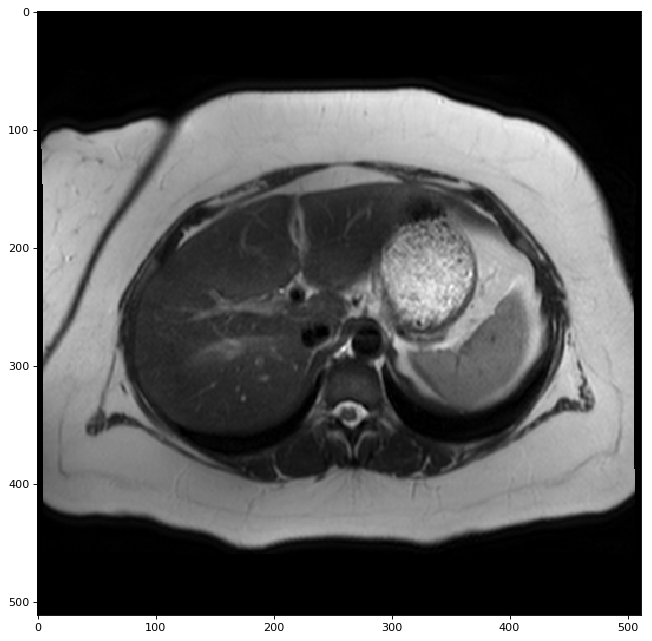

In [3]:
# Variable used to contain the dimension of the image to be rendered
pixel_dimension = (int(dicom_im.Rows), int(dicom_im.Columns))

# Declare an array. Initialise the array to all zeros
dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the pixel array to the dicom array we created
dicom_array[:,:]=dicom_im.pixel_array

# Set the plot details such as figure size, resolution and border colour 
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor="green")

# Set the image frame to square
plt.axes().set_aspect('equal') 

# Plot the image as grayscale
plt.set_cmap(plt.gray()) 

# Render the dicom image
plt.imshow(dicom_array[:,:])


### Edge Detection 

Now let's apply edge detecion techniques to dicom image

In this notebook, the following four edge detection tecniques are applied to the dicom image
1. Sobel
2. Roberts
3. Prewitt
4. Scharr

###### 1. Sobel

* Sobel Edge detection is one of the most commonly used edge detection technique
* Compared to other edge detection techniques, it is computationally simple
* The technique uses a 3x3 simple mask matrix to magnify the differences of pixels along the boundary where the values of pixels vary greatly
* Sobel edge detection uses two separate masks; one for horizontal edge detection and another for vertical edge detection
* However, in real time use, medical images very harizontal and vertical edge exist.
* As a result, sobel edge detection takes blocks of pixels from the image and apply both horizontal and vertical masks to find the edges

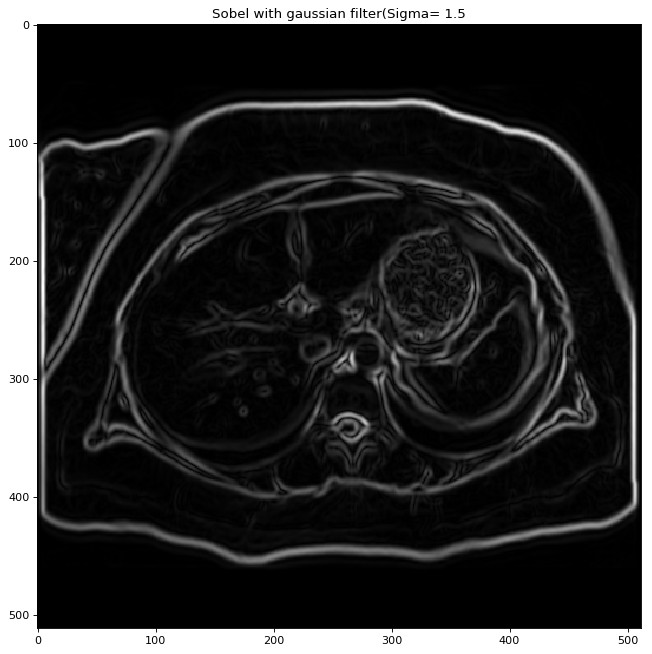

In [4]:
# Import the package that contains 
import skimage.filters as im_filter

from ipywidgets import interact

# Declare an array. Initialise the array to all zeros
sobel_dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the dicom image to a local array in order to render it
sobel_dicom_array[:,:]=dicom_im.pixel_array

# Applying sobel edge detection and storing it in a local array to render it
edge_sobel = im_filter.sobel(sobel_dicom_array)

# Applying gauusian filter to smoothen theedges
gaussian = im_filter.gaussian(sobel_dicom_array,sigma = 1.5)
    
# Applying the gaussian filter and copy it to edge_sobel_gaussian
edge_sobel_gaussian = im_filter.sobel(gaussian)
    
# Setting a figure frame in which the image will be displayed
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor="green")
    
# Setting the aspect ratio of the frame
plt.axes().set_aspect('equal') 
    
#Plot the image in grayscale
plt.set_cmap(plt.gray())
    
plt.title('Sobel with gaussian filter(Sigma= 1.5')
plt.imshow(edge_sobel_gaussian)





###### 2. Roberts
 * It uses two 2*2 mask to find the orthogonal derivatives
 * Extention to higher order image dimension is not possible in roberts edge detectiom
 * It is more sensitive to noise compared to the other edge detectors
 * It calculates the derivatives along the diagonal
 * It uses approximation between the two adjacent pixels of diagonal direction to detect the edges

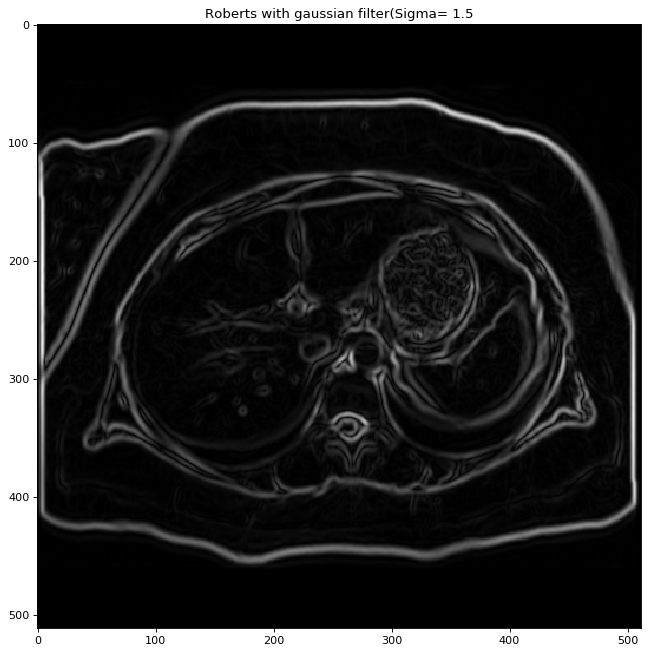

In [5]:
# Import the package that contains 
import skimage.filters as im_filter

from ipywidgets import interact

# Declare an array. Initialise the array to all zeros
sobel_dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the dicom image to a local array in order to render it
sobel_dicom_array[:,:]=dicom_im.pixel_array


# Applying gauusian filter to smoothen theedges
gaussian = im_filter.gaussian(sobel_dicom_array,sigma = 1.5)
    
# Applying the gaussian filter and copy it to edge_sobel_gaussian
edge_sobel_gaussian = im_filter.roberts(gaussian)
    
# Setting a figure frame in which the image will be displayed
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor="green")
    
# Setting the aspect ratio of the frame
plt.axes().set_aspect('equal') 
    
#Plot the image in grayscale
plt.set_cmap(plt.gray())
    
plt.title('Roberts with gaussian filter(Sigma= 1.5')
plt.imshow(edge_sobel_gaussian)



###### 3. Prewitt
 * Two convolution kernals formed prewitt detector
 * It detects the image using edge one by one  and takes the maximum value 
 * It detects both horizontal and vertical edges
 * It finds the local edge orientation of each pixels

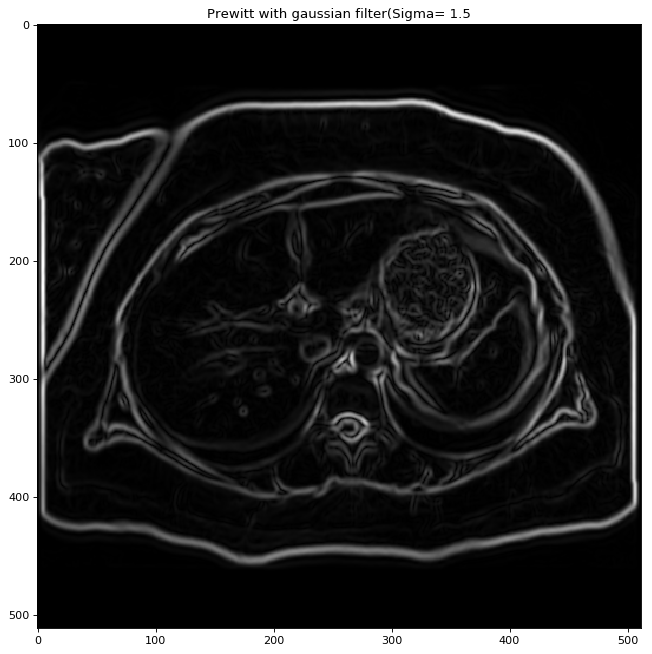

In [6]:
# Import the package that contains 
import skimage.filters as im_filter

from ipywidgets import interact

# Declare an array. Initialise the array to all zeros
sobel_dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the dicom image to a local array in order to render it
sobel_dicom_array[:,:]=dicom_im.pixel_array

# Applying gauusian filter to smoothen theedges
gaussian = im_filter.gaussian(sobel_dicom_array,sigma = 1.5)
    
# Applying the gaussian filter and copy it to edge_sobel_gaussian
edge_sobel_gaussian = im_filter.prewitt(gaussian)
    
# Setting a figure frame in which the image will be displayed
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor="green")
    
# Setting the aspect ratio of the frame
plt.axes().set_aspect('equal') 
    
#Plot the image in grayscale
plt.set_cmap(plt.gray())
    
plt.title('Prewitt with gaussian filter(Sigma= 1.5')
plt.imshow(edge_sobel_gaussian)



###### 4. Scharr
The Scharr function is one of the common edge detection technique provided with two kernals used to estimate the two dimensional second derivative horizontally and vertically

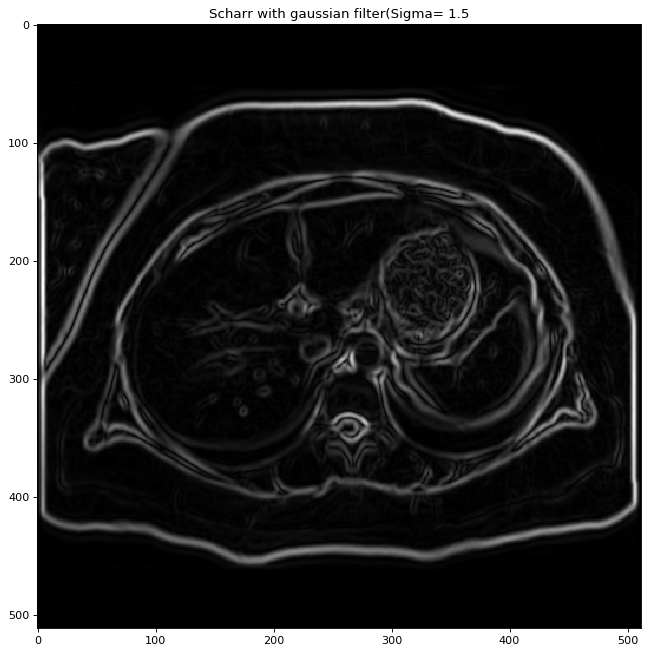

In [7]:

# Import the package that contains 
import skimage.filters as im_filter

from ipywidgets import interact

# Declare an array. Initialise the array to all zeros
sobel_dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the dicom image to a local array in order to render it
sobel_dicom_array[:,:]=dicom_im.pixel_array

# Applying gauusian filter to smoothen theedges
gaussian = im_filter.gaussian(sobel_dicom_array,sigma = 1.5)
    
# Applying the gaussian filter and copy it to edge_sobel_gaussian
edge_sobel_gaussian = im_filter.scharr(gaussian)
    
# Setting a figure frame in which the image will be displayed
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor="green")
    
# Setting the aspect ratio of the frame
plt.axes().set_aspect('equal') 
    
#Plot the image in grayscale
plt.set_cmap(plt.gray())
    
plt.title('Scharr with gaussian filter(Sigma= 1.5')
plt.imshow(edge_sobel_gaussian)



### Comparison between different edge detection techniques

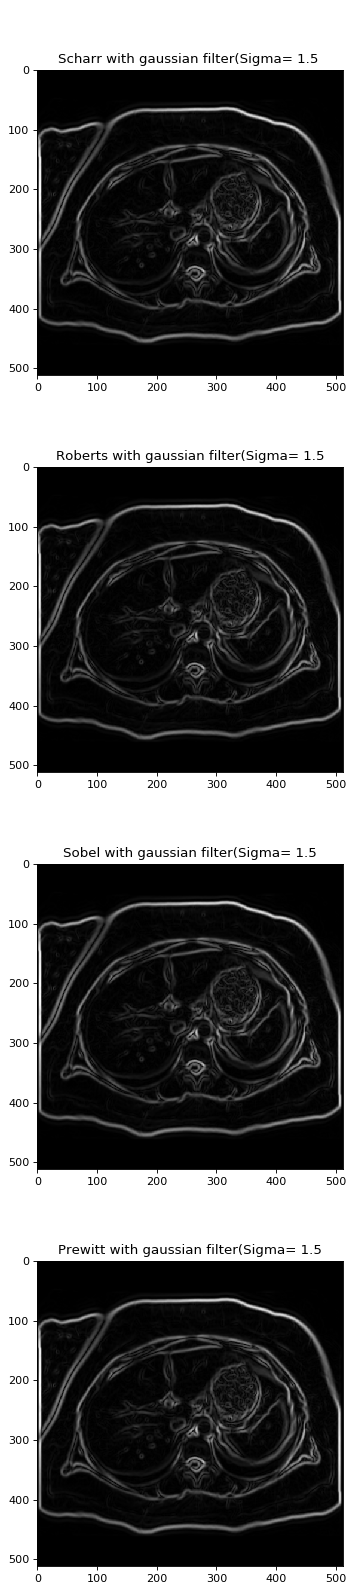

In [8]:

# Import the package that contains 
import skimage.filters as im_filter

from ipywidgets import interact

# Declare an array. Initialise the array to all zeros
sobel_dicom_array = np.zeros(pixel_dimension, dtype=dicom_im.pixel_array.dtype)

# Copy the dicom image to a local array in order to render it
sobel_dicom_array[:,:]=dicom_im.pixel_array


# Applying gauusian filter to smoothen theedges
gaussian = im_filter.gaussian(sobel_dicom_array,sigma =1.5)
    
# Applying the gaussian filter and copy it to edge_sobel_gaussian
edge_scharr_gaussian = im_filter.scharr(gaussian)
    
edge_roberts_gaussian = im_filter.roberts(gaussian)
    
edge_sobel_gaussian = im_filter.sobel(gaussian)
    
edge_prewitt_gaussian = im_filter.prewitt(gaussian)
    
# Setting a figure frame in which the image will be displayed
fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor="green")
    
# Setting the aspect ratio of the frame
plt.axes().set_aspect('equal') 
    
# Plot the image in grayscale
plt.set_cmap(plt.gray())
    
plt.subplot(4,1,1)    
plt.title('\n\n\nScharr with gaussian filter(Sigma= 1.5 ')
plt.imshow(edge_scharr_gaussian)
    
plt.subplot(4,1,2)    
plt.title('\n\n\nRoberts with gaussian filter(Sigma= 1.5')
plt.imshow(edge_roberts_gaussian)
    
plt.subplot(4,1,3)    
plt.title('\n\n\nSobel with gaussian filter(Sigma= 1.5')
plt.imshow(edge_sobel_gaussian)
    
plt.subplot(4,1,4)    
plt.title('\n\n\nPrewitt with gaussian filter(Sigma= 1.5')
plt.imshow(edge_prewitt_gaussian)
    
fig.tight_layout()
    




# conclusion 

In this notebook we used different edge detection functions like( sobel, Roberts, prewitt, scharr) to detect  the edges of the DICOM image so by using this edge detection techniques we can clearly find the liver in this MRI image  that allows to investigate and diagonise the patient.



# Reference
    
* Kishore, V. Vijaya, and R. V. S. Satyanarayana. "Performance evaluation of edge detectors-morphology based ROI segmentation   and nodule detection from DICOM lung images in the noisy environment." Advance Computing Conference (IACC), 2013 IEEE 3rd International. IEEE, 2013.
*  http://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html
* Chao, Yang. "A comparison of medical image analysis algorithms for edge detection." (2010).

   